# YOLO12 Object Detection on a roof Dataset

---


In [ ]:
!nvidia-smi

Sun Jul 13 18:52:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Instala dependências necessárias para o notebook.
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.9/112.6 GB disk)


**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [ ]:
#substituir pelo caminho da base de dados

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xxxxxxxxxxxxx")
project = rf.workspace("xxxx-xxxxxx-xxxx").project("xxxxxxxxxxxxx")
version = project.version(x)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Roof_automated-3 in yolov12:: 100%|██████████| 6382/6382 [00:00<00:00, 6625.11it/s]


## Custom Training

In [ ]:
# treinar o modelo
%cd {HOME}

!yolo task=detect mode=train model=yolo12s.pt data={dataset.location}/data.yaml epochs=250 imgsz=640 plots=True

/content
100% 18.1M/18.1M [00:00<00:00, 121MB/s] 
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Roof_automated-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=250, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patien

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml			 labels_correlogram.jpg  val_batch0_labels.jpg
BoxF1_curve.png			 labels.jpg		 val_batch0_pred.jpg
BoxP_curve.png			 results.csv		 val_batch1_labels.jpg
BoxPR_curve.png			 results.png		 val_batch1_pred.jpg
BoxR_curve.png			 train_batch0.jpg	 val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch1.jpg	 val_batch2_pred.jpg
confusion_matrix.png		 train_batch2.jpg	 weights


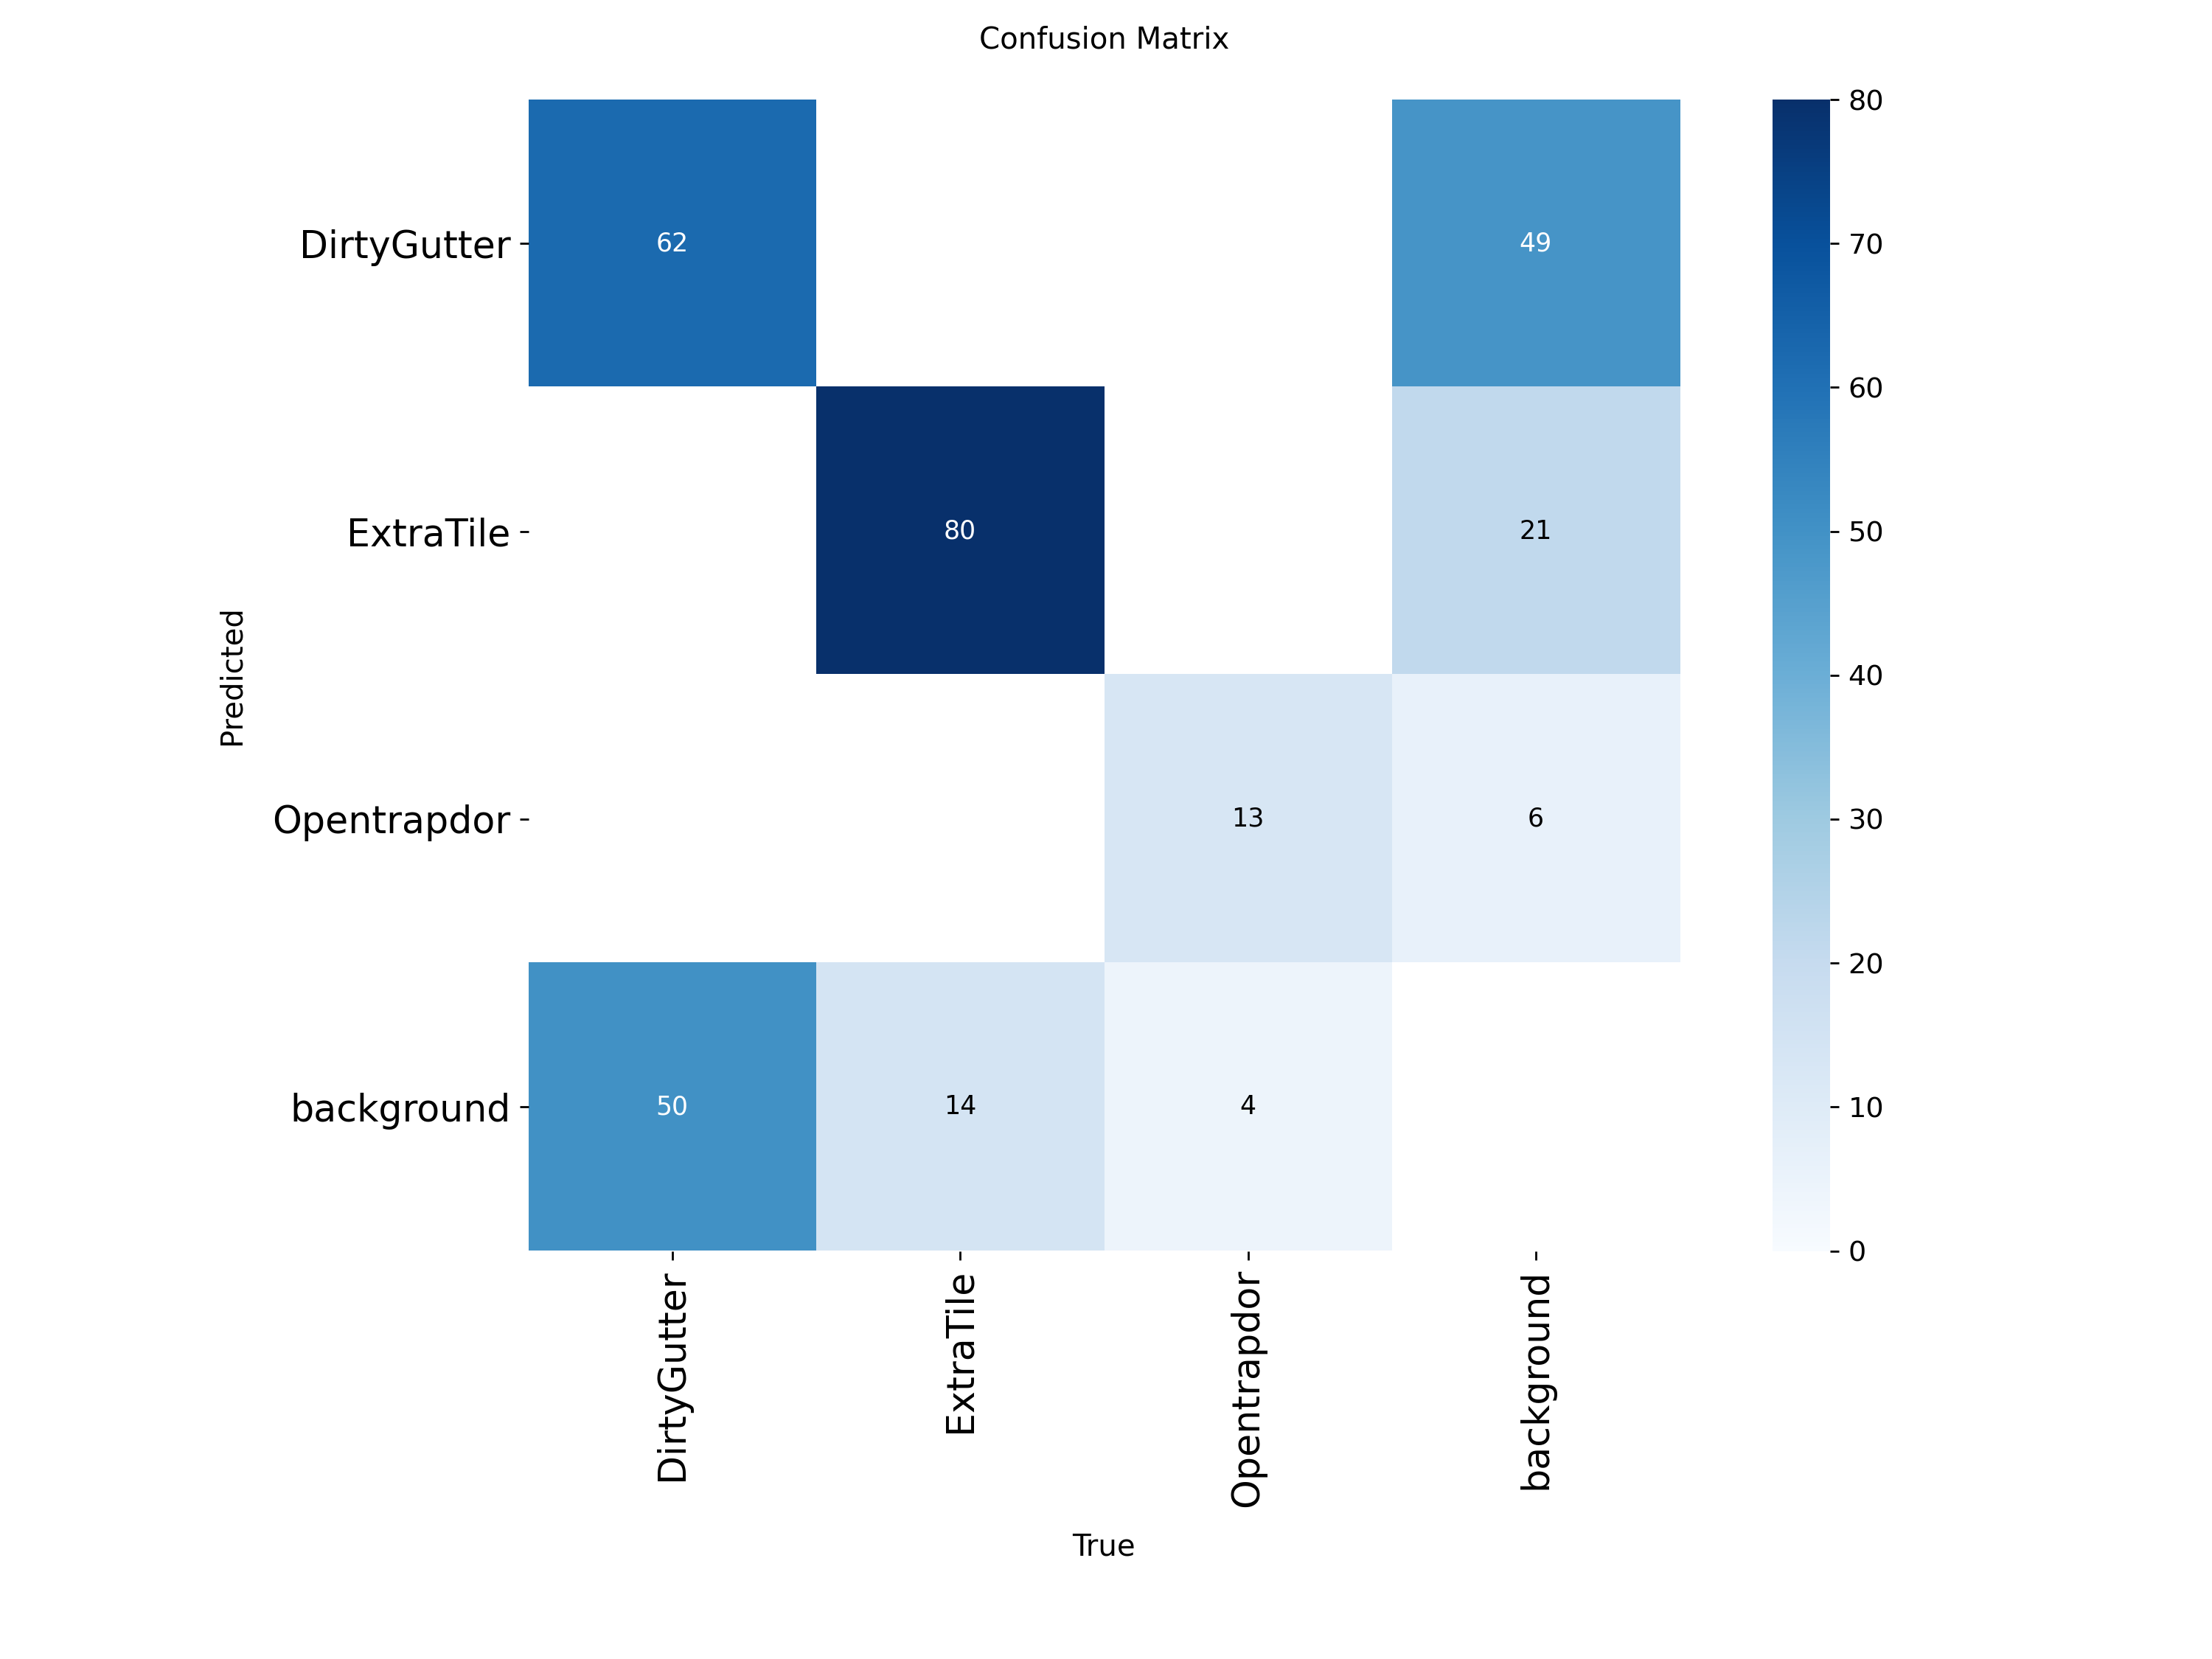

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

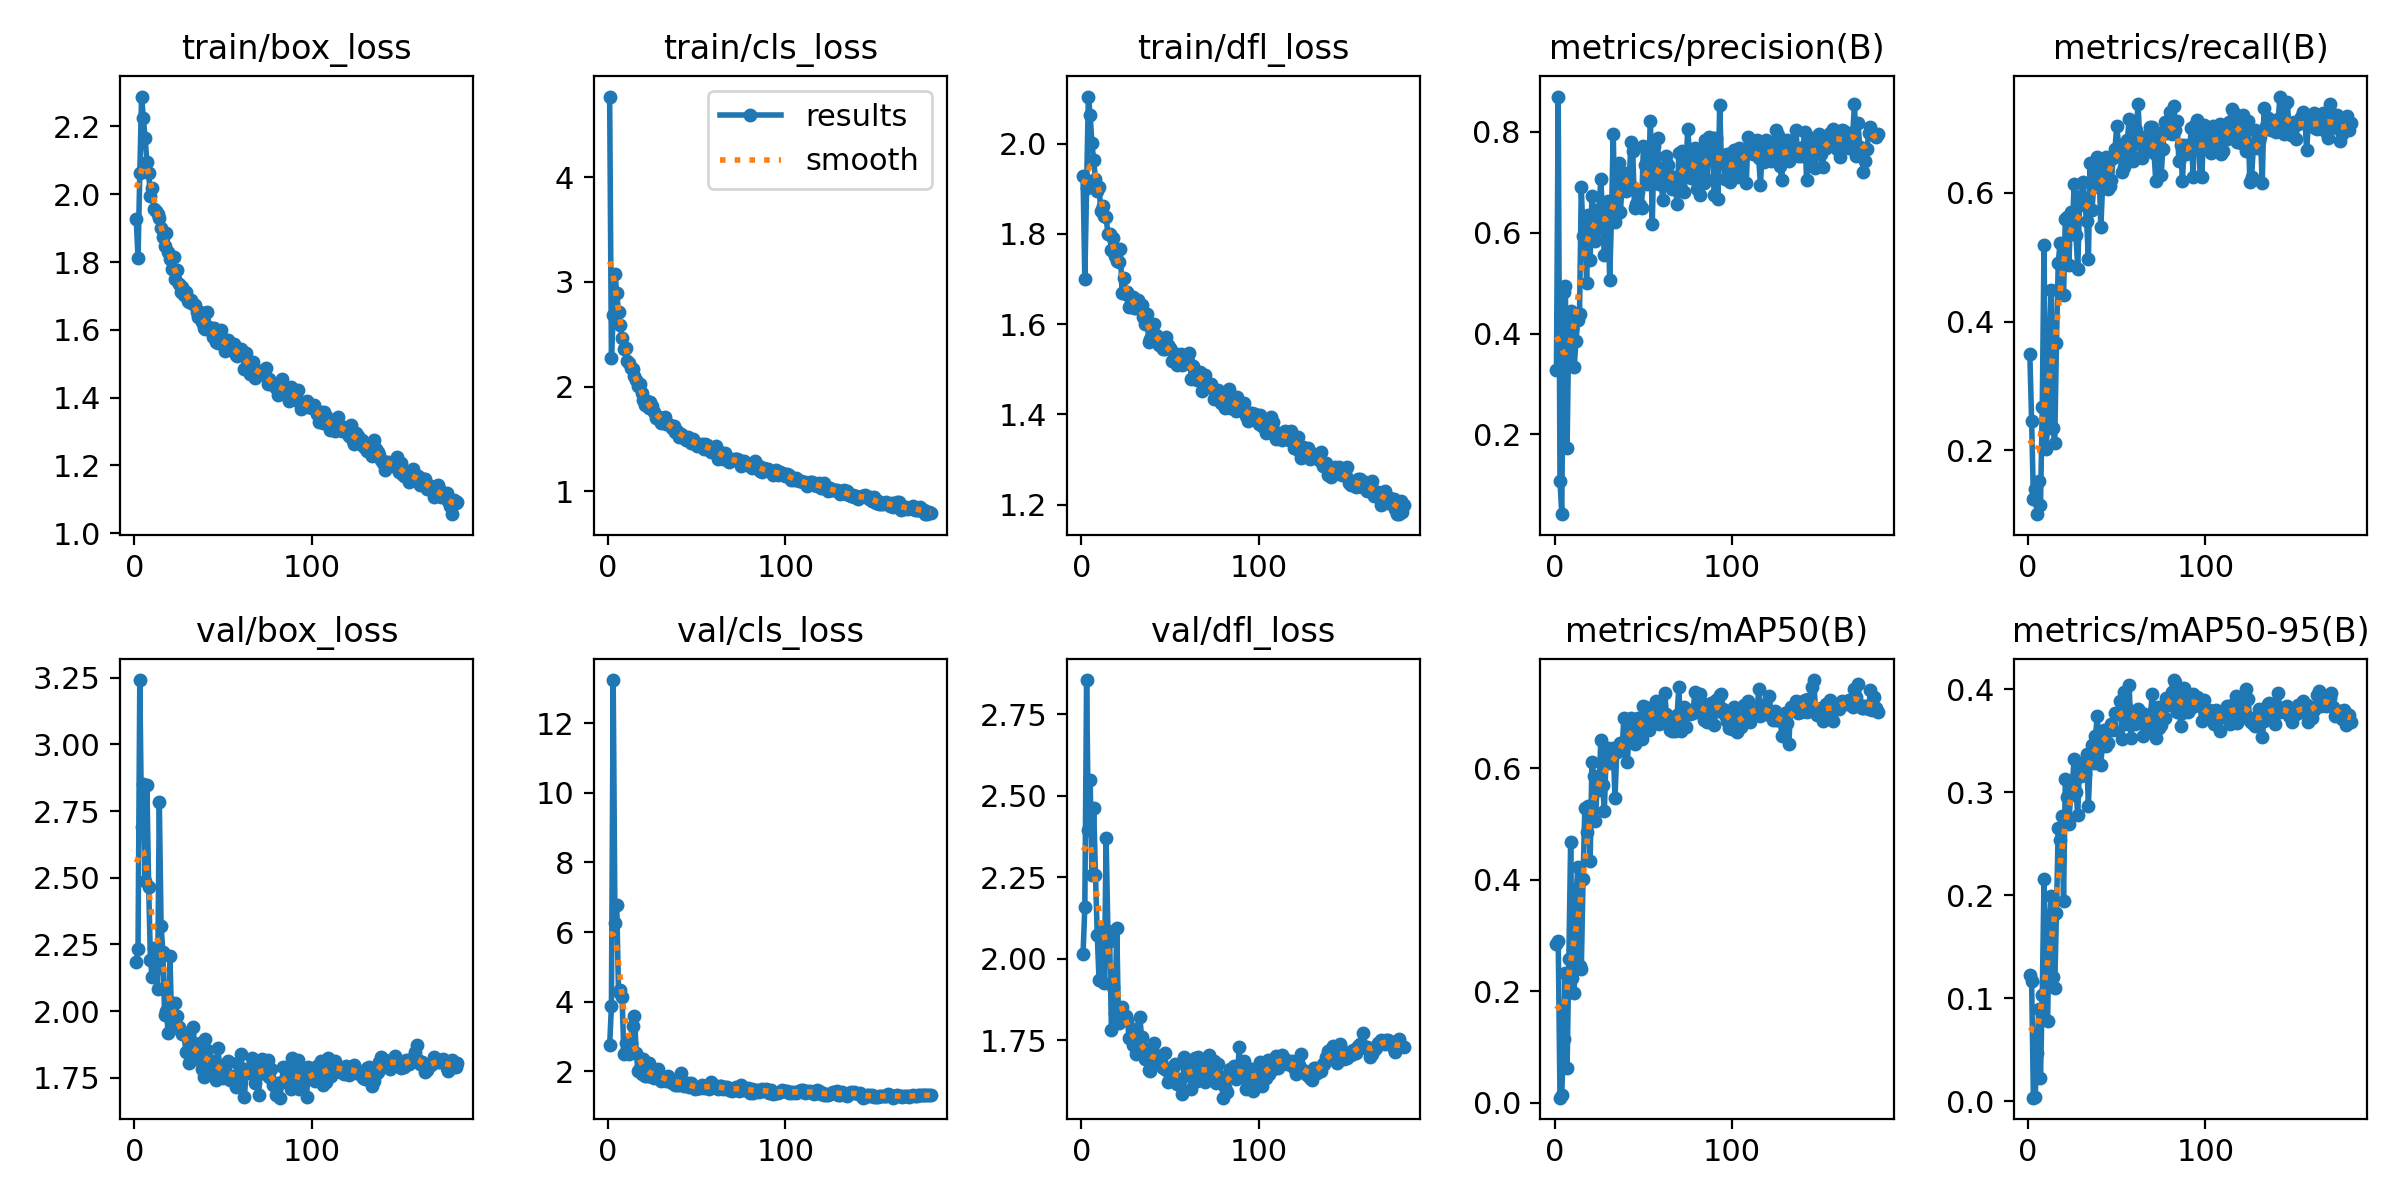

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

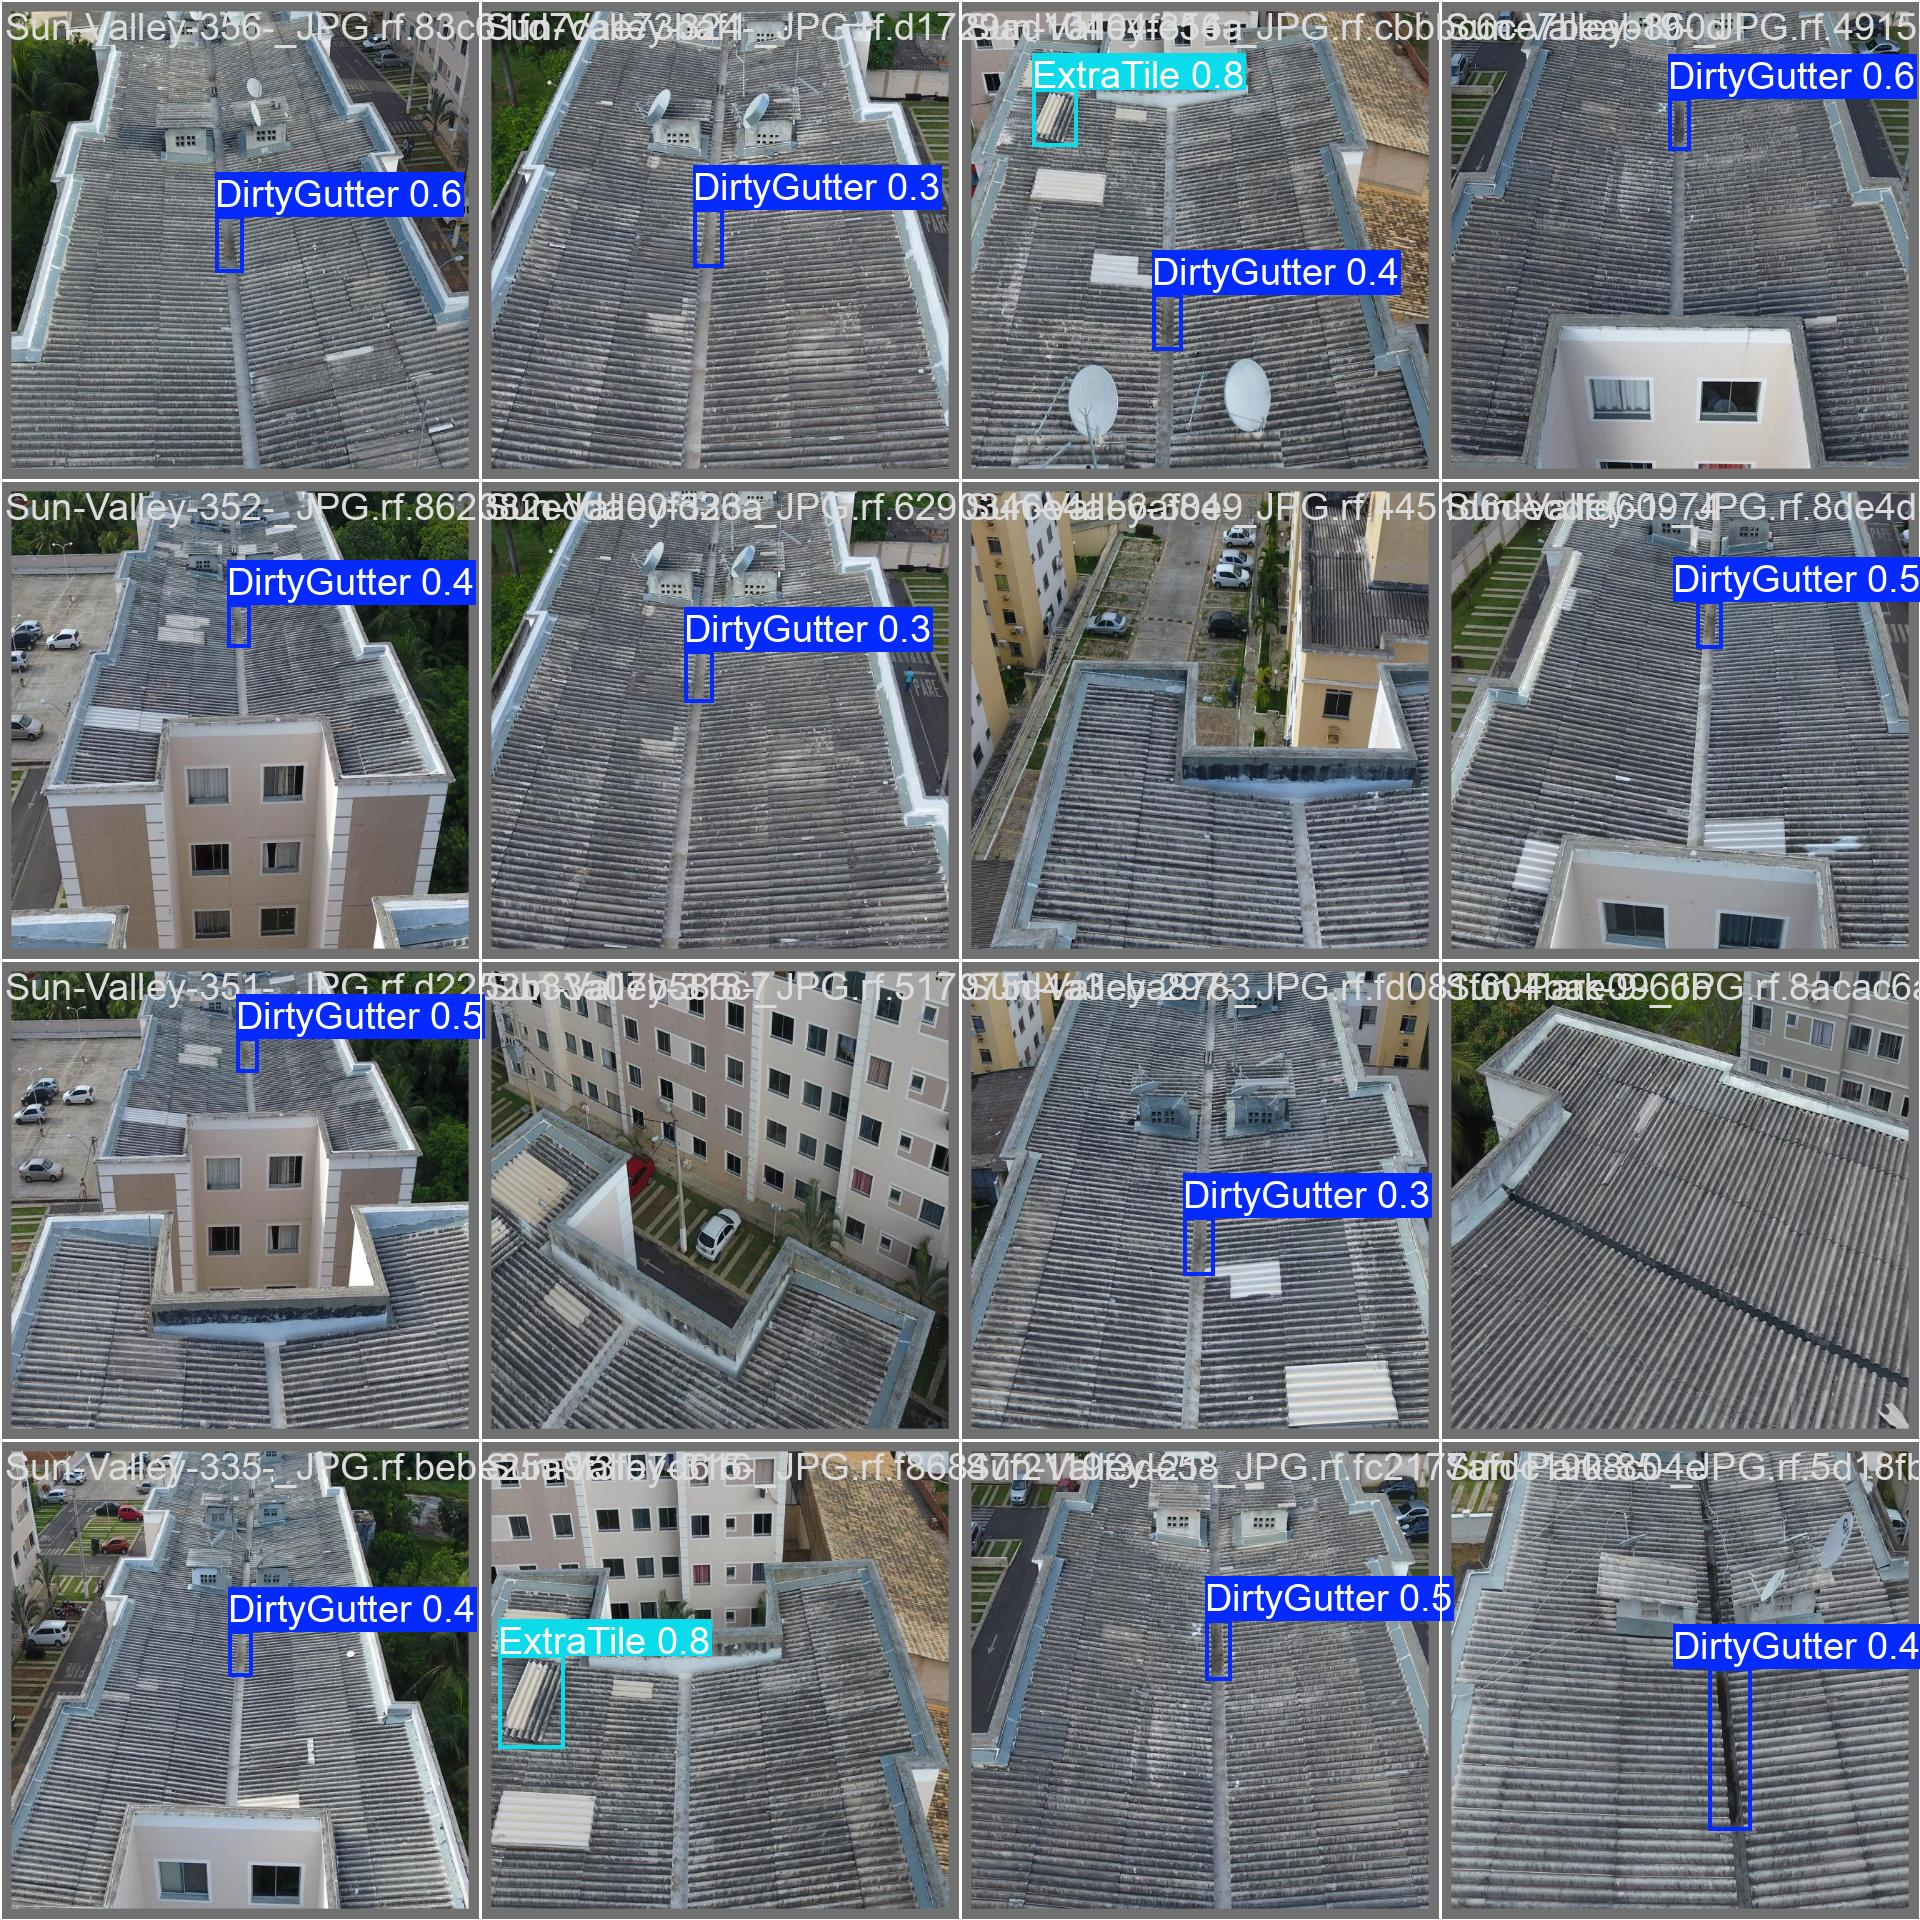

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,232,041 parameters, 0 gradients, 21.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1381.5±750.5 MB/s, size: 61.8 KB)
val: Scanning /content/Roof_automated-3/valid/labels.cache... 267 images, 115 backgrounds, 0 corrupt: 100% 267/267 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:06<00:00,  2.55it/s]
                   all        267        223      0.675      0.738      0.733      0.404
           DirtyGutter         88        112       0.54      0.544      0.514      0.193
             ExtraTile         61         94      0.786      0.851      0.839      0.567
           Opentrapdor         16         17      0.698      0.818      0.845      0.451
Speed: 2.9ms preprocess, 15.3ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at ht

## Inference with custom model

In [ ]:
# Carrega/configura o modelo YOLO e parâmetros do experimento.
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train/weights/best.pt")

In [ ]:
results = model.val(data='/content/Roof_automated-3/data.yaml', split='train', imgsz=640)

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,232,041 parameters, 0 gradients, 21.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1317.5±484.6 MB/s, size: 54.8 KB)


val: Scanning /content/Roof_automated-3/train/labels.cache... 2785 images, 1250 backgrounds, 0 corrupt: 100%|██████████| 2785/2785 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:46<00:00,  3.77it/s]


                   all       2785       2173      0.842      0.811      0.859      0.561
           DirtyGutter        833       1041      0.723      0.559      0.654      0.323
             ExtraTile        661        985      0.877      0.951      0.969      0.721
           Opentrapdor        147        147      0.925      0.923      0.955      0.638
Speed: 0.3ms preprocess, 13.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
results = model.val(data='/content/Roof_automated-3/data.yaml', split='test', imgsz=640)

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1536.1±442.0 MB/s, size: 64.9 KB)


val: Scanning /content/Roof_automated-3/test/labels... 133 images, 60 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<00:00, 2922.48it/s]

val: New cache created: /content/Roof_automated-3/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]


                   all        133         88      0.754      0.754      0.747      0.368
           DirtyGutter         40         44      0.748      0.682       0.69      0.224
             ExtraTile         30         37      0.756      0.865      0.833      0.556
           Opentrapdor          7          7      0.757      0.714      0.719      0.324
Speed: 1.4ms preprocess, 14.8ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val3


In [ ]:
# Monta/integra armazenamento externo e prepara o ambiente.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
results = model.val(data='/content/Roof_automated-3/data.yaml', split='val', imgsz=640)

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2656.7±753.6 MB/s, size: 79.2 KB)


val: Scanning /content/Roof_automated-3/valid/labels.cache... 267 images, 115 backgrounds, 0 corrupt: 100%|██████████| 267/267 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.79it/s]


                   all        267        223      0.675      0.738      0.733      0.404
           DirtyGutter         88        112       0.54      0.544      0.514      0.193
             ExtraTile         61         94      0.786      0.851      0.839      0.567
           Opentrapdor         16         17      0.698      0.818      0.845      0.451
Speed: 0.6ms preprocess, 13.9ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val4
